This is a first attempt at using the environment and agent together. The agent is a simple tabular q-learner and the environment is static.

In [4]:
import matplotlib.pyplot as plt
from treasure_hunt.environment import FixedTreasureHuntEnv
from treasure_hunt.agent import TabularQLearner
from gymnasium.wrappers import TimeLimit

from treasure_hunt.utils import RLRunner

In [ ]:
# Initialize environment and agent
env = TimeLimit(FixedTreasureHuntEnv(), 500)
agent = TabularQLearner(env)

In [ ]:
# Setup the runner
runner = RLRunner(agen, env, total_epochs=20)

In [2]:
# Train the agent
total_epochs = 100
reward_history = []
for epoch_no in range(total_epochs):
    env.reset()
    agent.train(total_timesteps=1000)
    print(f"Episode {epoch_no + 1}/{total_epochs} - Training complete")
    mean_reward, _ = agent.evaluate(n_episodes=5)
    reward_history.append(mean_reward)
    print(f"Episode {epoch_no + 1}/{total_epochs} - Mean reward: {mean_reward}")

Episode 1/100 - Training complete
Episode 1/100 - Mean reward: -500.0
Episode 2/100 - Training complete
Episode 2/100 - Mean reward: -500.0
Episode 3/100 - Training complete
Episode 3/100 - Mean reward: -5000.0
Episode 4/100 - Training complete
Episode 4/100 - Mean reward: -500.0
Episode 5/100 - Training complete
Episode 5/100 - Mean reward: 181.0
Episode 6/100 - Training complete
Episode 6/100 - Mean reward: -500.0
Episode 7/100 - Training complete
Episode 7/100 - Mean reward: -4991.0
Episode 8/100 - Training complete
Episode 8/100 - Mean reward: -500.0
Episode 9/100 - Training complete
Episode 9/100 - Mean reward: -500.0
Episode 10/100 - Training complete
Episode 10/100 - Mean reward: 183.0
Episode 11/100 - Training complete
Episode 11/100 - Mean reward: 183.0
Episode 12/100 - Training complete
Episode 12/100 - Mean reward: 183.0
Episode 13/100 - Training complete
Episode 13/100 - Mean reward: 183.0
Episode 14/100 - Training complete
Episode 14/100 - Mean reward: 183.0
Episode 15/100

Mean Reward after training: 183.0


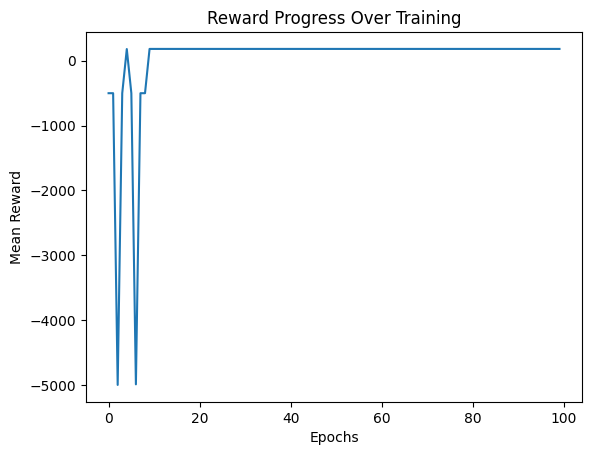

In [3]:
# Evaluate the agent
mean_reward, rewards = agent.evaluate(n_episodes=10)
print(f"Mean Reward after training: {mean_reward}")

# Plot reward history
plt.plot(reward_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Reward")
plt.title("Reward Progress Over Training")
plt.show()

In [33]:
len([r for r in reward_history if r < 0])

10

In [34]:
import os
import pickle
from datetime import datetime

# Get current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Create results directory with timestamp subfolder if it doesn't exist
results_dir = os.path.join('results', 'qlearner-static', timestamp)
os.makedirs(results_dir, exist_ok=True)

# Save reward history
with open(os.path.join(results_dir, 'reward_history.pkl'), 'wb') as f:
    pickle.dump(reward_history, f)

# Save mean reward
with open(os.path.join(results_dir, 'mean_reward.txt'), 'w') as f:
    f.write(str(mean_reward))

# Save rewards
with open(os.path.join(results_dir, 'rewards.pkl'), 'wb') as f:
    pickle.dump(rewards, f)

print(f"Results saved to the '{results_dir}' folder.")

Results saved to the 'results/qlearner-static/20241223_183946' folder.
